In [10]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [11]:
# cd gdrive/MyDrive/lab3

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("vTargetMailCustomer.csv",parse_dates = True, encoding = 'latin1', keep_default_na=False)

In [3]:
data.columns
data = data.drop(columns= ['CustomerKey','CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle','Suffix', 'EmailAddress', 'SpanishEducation', 'FrenchEducation','SpanishOccupation', 'FrenchOccupation','AddressLine1', 'AddressLine2', 'Phone','BirthDate'])
data.head()

,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,26,M,M,90000,2,0,Bachelors,Professional,1,0,7/22/2005,1-2 Miles,Pacific,49,1
1,37,S,M,60000,3,3,Bachelors,Professional,0,1,7/18/2005,0-1 Miles,Pacific,50,1
2,31,M,M,60000,3,3,Bachelors,Professional,1,1,7/10/2005,2-5 Miles,Pacific,50,1
3,11,S,F,70000,0,0,Bachelors,Professional,0,1,7/1/2005,5-10 Miles,Pacific,47,1
4,19,S,F,80000,5,5,Bachelors,Professional,1,4,7/26/2005,1-2 Miles,Pacific,47,1


In [4]:
# one_hot_Education = pd.get_dummies(data['EnglishEducation'], prefix = 'EncodedEducation')
# data= data.drop('EnglishEducation', axis = 1)
# data = data.join(one_hot_Education)

one_hot_Gender = pd.get_dummies(data['Gender'], prefix = 'EncodedGender')
data= data.drop('Gender', axis = 1)
data = data.join(one_hot_Gender)

one_hot_Marriage = pd.get_dummies(data['MaritalStatus'], prefix = 'EncodedMaritalStatus')
data= data.drop('MaritalStatus', axis = 1)
data = data.join(one_hot_Marriage)

one_hot_House = pd.get_dummies(data['HouseOwnerFlag'], prefix = 'EncodedHouseOwnerFlag')
data= data.drop('HouseOwnerFlag', axis = 1)
data = data.join(one_hot_House)

one_hot_Region = pd.get_dummies(data['Region'], prefix = 'EncodedRegion')
data= data.drop('Region', axis = 1)
data = data.join(one_hot_Region)

one_hot_Occupation = pd.get_dummies(data['EnglishOccupation'], prefix = 'EncodedOccupation')
data= data.drop('EnglishOccupation', axis = 1)
data = data.join(one_hot_Occupation)

In [5]:
data = data.drop(columns = ['DateFirstPurchase'])
data.head()

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,EncodedGender_F,...,EncodedHouseOwnerFlag_0,EncodedHouseOwnerFlag_1,EncodedRegion_Europe,EncodedRegion_North America,EncodedRegion_Pacific,EncodedOccupation_Clerical,EncodedOccupation_Management,EncodedOccupation_Manual,EncodedOccupation_Professional,EncodedOccupation_Skilled Manual
0,26,90000,2,0,Bachelors,0,1-2 Miles,49,1,0,...,0,1,0,0,1,0,0,0,1,0
1,37,60000,3,3,Bachelors,1,0-1 Miles,50,1,0,...,1,0,0,0,1,0,0,0,1,0
2,31,60000,3,3,Bachelors,1,2-5 Miles,50,1,0,...,0,1,0,0,1,0,0,0,1,0
3,11,70000,0,0,Bachelors,1,5-10 Miles,47,1,1,...,1,0,0,0,1,0,0,0,1,0
4,19,80000,5,5,Bachelors,4,1-2 Miles,47,1,1,...,0,1,0,0,1,0,0,0,1,0


In [6]:
data['EnglishEducation'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [7]:
mean_income = data['YearlyIncome'].mean()
max_income = data['YearlyIncome'].max()
min_income = data['YearlyIncome'].min()
data['YearlyIncome'] = data['YearlyIncome'].apply(lambda x: abs((x - min_income ) / (max_income - min_income)))

mean_key = data['GeographyKey'].mean()
max_key = data['GeographyKey'].max()
min_key = data['GeographyKey'].min()
data['GeographyKey'] = data['GeographyKey'].apply(lambda x: abs((x - min_key) / (max_key - min_key)))

mean_age = data['Age'].mean()
max_age = data['Age'].max()
min_age = data['Age'].min()
data['Age'] = data['Age'].apply(lambda x: abs((x - min_age ) / (max_age -min_age )))

mean_children = data['TotalChildren'].mean()
max_children = data['TotalChildren'].max()
min_children = data['TotalChildren'].min()
data['TotalChildren'] = data['TotalChildren'].apply(lambda x: abs((x - min_children ) / (max_children -min_children )))

mean_childrenNo = data['NumberChildrenAtHome'].mean()
max_childrenNo = data['NumberChildrenAtHome'].max()
min_childrenNo = data['NumberChildrenAtHome'].min()
data['NumberChildrenAtHome'] = data['NumberChildrenAtHome'].apply(lambda x: abs((x - min_childrenNo ) / (max_childrenNo -min_childrenNo)))

mean_cars = data['NumberCarsOwned'].mean()
max_cars = data['NumberCarsOwned'].max()
min_cars = data['NumberCarsOwned'].min()
data['NumberCarsOwned'] = data['NumberCarsOwned'].apply(lambda x: abs((x - min_cars ) / (max_cars -min_cars)))

data['CommuteDistance'].unique()
bins = [0.5,1.5,2.5,10]   #0-1->0.5, 1-2->0.5, 2-5->1.5, 5-10->2.5, 10+-> 10
data['CommuteDistance'] = data['CommuteDistance'].apply(lambda x: bins[0] if ('0-1' in x or '1-2' in x) else ( bins[1] if ('2-5' in x) else (bins[2] if ('5-10' in x) else bins[3])))

data['EnglishEducation'].unique()
binsEdu = [1,2,3] #school/partial school-1, bacheors/college -2, graduate-3
data['EnglishEducation'] = data['EnglishEducation'].apply(lambda x: binsEdu[2] if ('High School' in x or 'Partial High School' in x) else ( binsEdu[1] if ('Partial College' in x or 'Bachelors' in x) else binsEdu[0] ))

mean_Edu = data['EnglishEducation'].mean()
max_Edu = data['EnglishEducation'].max()
min_Edu = data['EnglishEducation'].min()
data['EnglishEducation'] = data['EnglishEducation'].apply(lambda x: abs((x - min_Edu ) / (max_Edu -min_Edu )))

mean_commute_distance = data['CommuteDistance'].mean()
max_commute_distance = data['CommuteDistance'].max()
min_commute_distance = data['CommuteDistance'].min()
data['CommuteDistance'] = data['CommuteDistance'].apply(lambda x: abs((x - min_commute_distance ) / (max_commute_distance -min_commute_distance)))

In [7]:
mean_income = data['YearlyIncome'].mean()
std_income = data['YearlyIncome'].std()
data['YearlyIncome'] = data['YearlyIncome'].apply(lambda x: abs((x - mean_income ) / (std_income)))

mean_key = data['GeographyKey'].mean()
std_key = data['GeographyKey'].mean()
data['GeographyKey'] = data['GeographyKey'].apply(lambda x: abs((x - mean_key ) / (std_key)))

mean_age = data['Age'].mean()
std_age =  data['Age'].std()
data['Age'] = data['Age'].apply(lambda x: abs((x - mean_age ) / (std_age)))

mean_children = data['TotalChildren'].mean()
std_children = data['TotalChildren'].std()
data['TotalChildren'] = data['TotalChildren'].apply(lambda x: abs((x - mean_children ) / (std_children)))

mean_childrenNo = data['NumberChildrenAtHome'].mean()
std_childrenNo = data['NumberChildrenAtHome'].std()
data['NumberChildrenAtHome'] = data['NumberChildrenAtHome'].apply(lambda x: abs((x - mean_children ) / (std_childrenNo)))

mean_cars = data['NumberCarsOwned'].mean()
std_cars = data['NumberCarsOwned'].std()
data['NumberCarsOwned'] = data['NumberCarsOwned'].apply(lambda x: abs((x - mean_cars ) / (std_cars)))

data['CommuteDistance'].unique()
bins = [0.5,1.5,2.5,10]   #0-1->0.5, 1-2->0.5, 2-5->1.5, 5-10->2.5, 10+-> 10
data['CommuteDistance'] = data['CommuteDistance'].apply(lambda x: bins[0] if ('0-1' in x or '1-2' in x) else ( bins[1] if ('2-5' in x) else (bins[2] if ('5-10' in x) else bins[3])))
mean_commute_distance = data['CommuteDistance'].mean()
std_commute = data['CommuteDistance'].std()
data['CommuteDistance'] = data['CommuteDistance'].apply(lambda x: abs((x - mean_commute_distance ) / (std_commute)))

data['EnglishEducation'].unique()
binsEdu = [1,2,3] #school/partial school-1, bacheors/college -2, graduate-3
data['EnglishEducation'] = data['EnglishEducation'].apply(lambda x: binsEdu[2] if ('High School' in x or 'Partial High School' in x) else ( binsEdu[1] if ('Partial College' in x or 'Bachelors' in x) else binsEdu[0] ))
mean_Edu = data['EnglishEducation'].mean()
std_Edu = data['EnglishEducation'].std()
data['EnglishEducation'] = data['EnglishEducation'].apply(lambda x: abs((x - mean_Edu) / (std_Edu )))

In [298]:
data['DateFirstPurchase'] = pd.to_datetime(data['DateFirstPurchase']).astype('int64')
mean_birth_date = data['DateFirstPurchase'].mean()
max_birth_date = data['DateFirstPurchase'].max()
min_birth_date = data['DateFirstPurchase'].min()
data['DateFirstPurchase'] = data['DateFirstPurchase'].apply(lambda x: abs((x - mean_birth_date ) / (max_birth_date -min_birth_date)))


data['BirthDate'] = pd.to_datetime(data['BirthDate']).astype('int64')
mean_birth_date = data['BirthDate'].mean()
max_birth_date = data['BirthDate'].max()
min_birth_date = data['BirthDate'].min()
data['BirthDate'] = data['BirthDate'].apply(lambda x: abs((x - mean_birth_date ) / (max_birth_date -min_birth_date)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


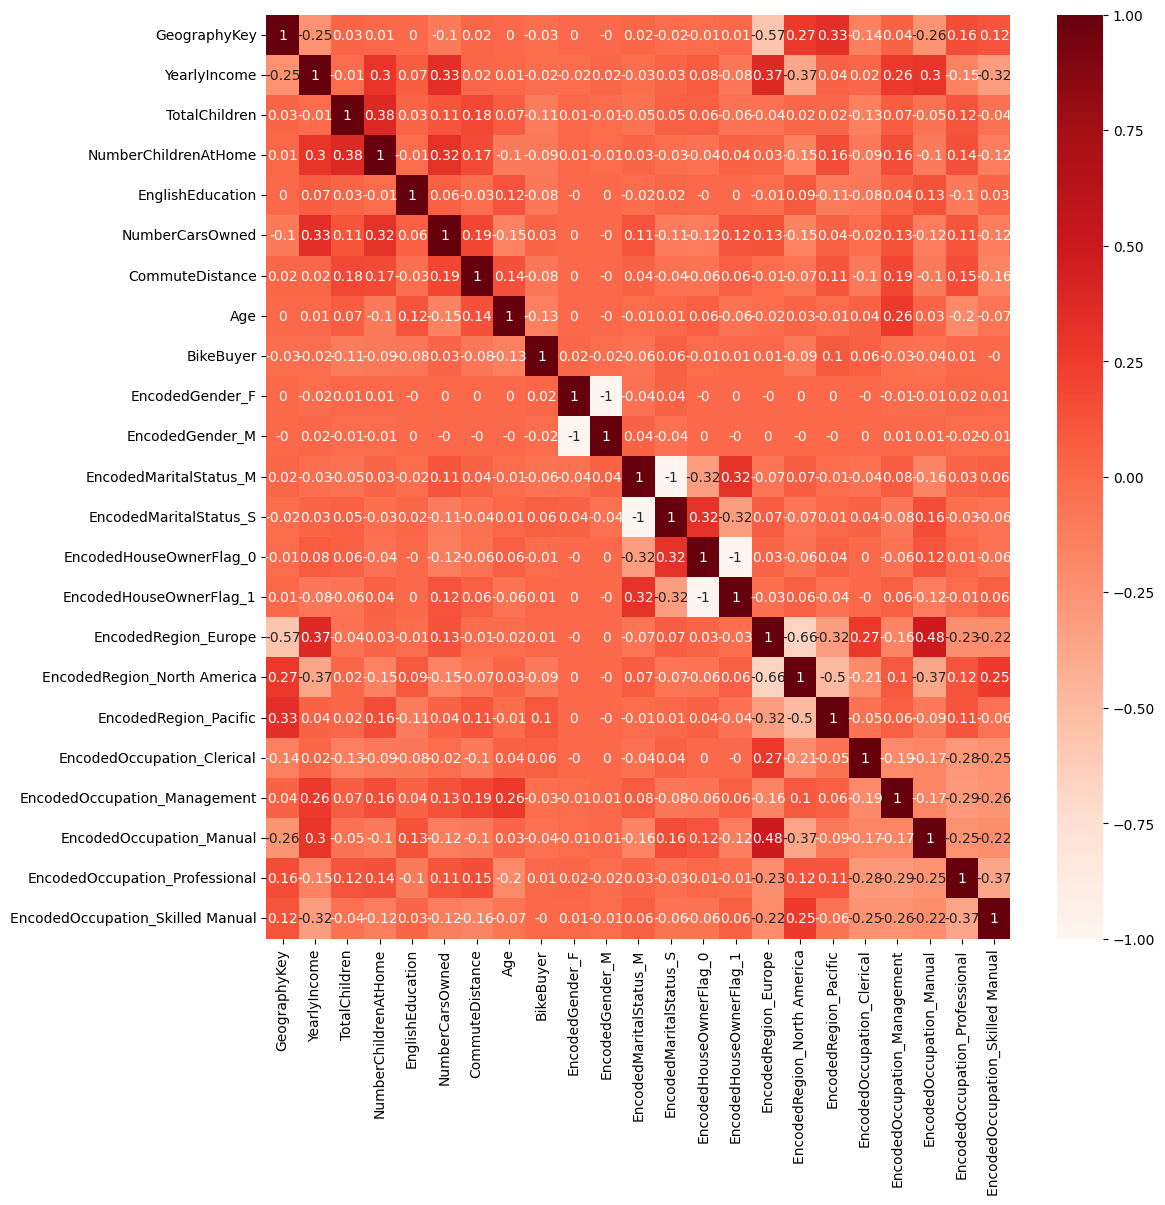

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
data_set = data
matrix = data_set.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
X = data.drop(columns=['BikeBuyer'])
Y = data[['BikeBuyer']]

In [17]:
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]

In [56]:
data.tail()

,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
18479,209,M,M,30000,1,0,Graduate Degree,Clerical,1,0,3/8/2007,0-1 Miles,Europe,57,1
18480,248,S,F,30000,3,0,Graduate Degree,Clerical,1,0,1/18/2008,0-1 Miles,Europe,54,1
18481,120,S,M,30000,3,0,Graduate Degree,Clerical,0,0,2/13/2006,0-1 Miles,Europe,55,1
18482,179,M,M,30000,3,0,Bachelors,Clerical,1,0,3/22/2007,0-1 Miles,Europe,56,1
18483,217,M,M,30000,0,0,Bachelors,Clerical,1,0,3/13/2007,0-1 Miles,Europe,55,1


In [91]:
X.shape


(18484, 22)

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [21]:
features = ['DateFirstPurchase','EncodedRegion_Europe','EncodedRegion_Pacific','EncodedHouseOwnerFlag_1','EncodedMaritalStatus_S','EncodedEducation_Bachelors',
       'EncodedEducation_Graduate Degree','EncodedEducation_Partial College','NumberCarsOwned']

In [45]:
X = data[features]

In [9]:
X = data.drop(columns=['BikeBuyer'])
Y = data[['BikeBuyer']]

In [10]:
# from sklearn.feature_selection import SelectKBest, chi2
# X = SelectKBest(chi2, k=28).fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(14787, 22) (14787, 1)
(3697, 22) (3697, 1)


In [11]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# clf.get_params()

In [12]:
from sklearn.model_selection import cross_val_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
cross_val_score(clf,X,Y,cv=5)
#clf.cost_complexity_pruning_path(X, Y)
print(clf.criterion)
print('depth: ',clf.get_depth())
print('leaves: ',clf.get_n_leaves())

Accuracy: 74.24939139843116 %
gini
depth:  35
leaves:  3777


In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred,labels=[0,1]))
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Confusion Matrix:
 [[1418  458]
 [ 494 1327]]
Precision: 0.7434173669467787
Recall: 0.7287204832509611


In [14]:
import keras

2022-11-02 14:49:22.122865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# X = data.drop(columns=['BikeBuyer'])
# Y = data[['BikeBuyer']]
len(X.columns)

22

In [33]:
from keras.optimizers import SGD
model = keras.models.Sequential()

opt = SGD(learning_rate=0.08, momentum=0.9)
#model.add(keras.layers.Dense(84, activation='relu', input_shape=(21,)))
# model.add(keras.layers.Dense(56, activation='relu', input_shape=(22,)))
model.add(keras.layers.Dense(28, activation='relu', input_shape = (22,)))
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28)                644       
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


In [34]:
#hist = model.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])
#hist = model.fit(X,Y, epochs=50, batch_size = 100)

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=70, batch_size=50)


Epoch 1/70
296/296 [==============================] - 1s 2ms/step - loss: 0.2406 - accuracy: 0.5865 - val_loss: 0.2306 - val_accuracy: 0.6297
Epoch 2/70
296/296 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.6442 - val_loss: 0.2203 - val_accuracy: 0.6687
Epoch 3/70
296/296 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.6673 - val_loss: 0.2124 - val_accuracy: 0.6819
Epoch 4/70
296/296 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.6782 - val_loss: 0.2083 - val_accuracy: 0.6862
Epoch 5/70
296/296 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.6865 - val_loss: 0.2045 - val_accuracy: 0.6911
Epoch 6/70
296/296 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.6912 - val_loss: 0.2022 - val_accuracy: 0.6895
Epoch 7/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.6976 - val_loss: 0.2020 - val_accuracy: 0.6800
Epoch 

296/296 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.7597 - val_loss: 0.1774 - val_accuracy: 0.7379
Epoch 59/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.7592 - val_loss: 0.1782 - val_accuracy: 0.7447
Epoch 60/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.7597 - val_loss: 0.1779 - val_accuracy: 0.7338
Epoch 61/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.7600 - val_loss: 0.1765 - val_accuracy: 0.7449
Epoch 62/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.7632 - val_loss: 0.1764 - val_accuracy: 0.7452
Epoch 63/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.7616 - val_loss: 0.1768 - val_accuracy: 0.7444
Epoch 64/70
296/296 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.7634 - val_loss: 0.1763 - val_accuracy: 0.7468
Epoch 65/70

In [20]:
import numpy as np
# predictions = (model.predict(X) > 0.5).astype(int)
# for i in range(5):
# 	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

#test_data = np.array([2,	0.050272,	0.016839,	0.23113,	0.084688,	0.044166,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0])
#print(model.predict(test_data.reshape(1,16), batch_size=1))

116/116 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.7493
Accuracy: 74.93


[]

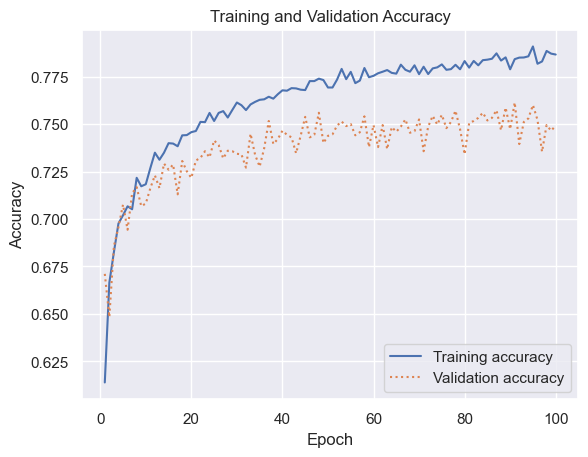

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# y_predicted = model.predict(x_test) > 0.7
# mat = confusion_matrix(y_test, y_predicted)
# labels = ['Yes', 'No']
 
# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
#             xticklabels=labels, yticklabels=labels)
 
# plt.xlabel('Predicted label')
# plt.ylabel('Actual label')

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['BikeBuyer'])
Y = data[['BikeBuyer']]
#X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
import numpy as np

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, np.squeeze(y_train))#y_train.values.ravel())
y_pred = gnb.fit(X_train, y_train).predict(X_test)

/opt/anaconda3/envs/tensorenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred,labels=[0,1]))
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Model accuracy score: 0.6248
Confusion Matrix:
 [[1158  703]
 [ 684 1152]]
Precision: 0.6210242587601078
Recall: 0.6274509803921569


In [30]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['BikeBuyer'])
Y = data[['BikeBuyer']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # linear and rbf Kernel used

#Train the model using the training sets
clf.fit(X_train,np.squeeze(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred,labels=[0,1]))
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))

Accuracy: 72.27481741952934 %
Confusion Matrix:
 [[1376  471]
 [ 554 1296]]
Precision: 0.733446519524618
Recall: 0.7005405405405405


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
  
#X = data.drop(columns=['BikeBuyer'])
Y = data[['BikeBuyer']]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, Y, test_size = 0.2, random_state=45)
  
knn = KNeighborsClassifier(n_neighbors=3)
  
y_pred = knn.fit(X_train, y_train).predict(X_test)

  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))
print('Accuracy:',knn.score(X_test, y_test)*100,'%')
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))


/opt/anaconda3/envs/tensorenv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 1 1 ... 0 0 1]
Accuracy: 74.41168515012173 %
Confusion Matrix:
 [[1409  449]
 [ 497 1342]]
Precision: 0.7493020658849805
Recall: 0.7297444263186514


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

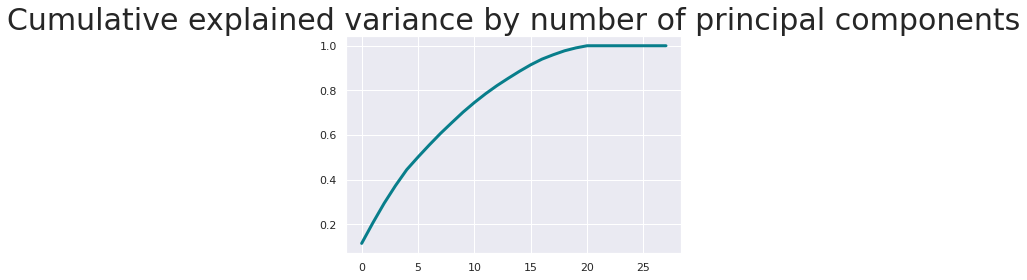

In [330]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=30)
plt.show()

In [331]:
X = data.drop(columns=['BikeBuyer'])

Y = data[['BikeBuyer']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
GeographyKey,-0.454563,-0.430164,0.074372,-0.152377,-0.069624,-0.296897,0.036977,-0.070840,-0.142520,0.116718,...,-0.245690,0.230979,0.022838,0.000004,-5.715406e-32,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
BirthDate,0.125902,-0.127454,0.769342,0.479501,0.012677,-0.165743,0.142147,0.052143,0.015958,-0.147794,...,0.005183,0.007473,-0.015533,0.022491,-6.766278e-31,-2.846096e-31,3.583971e-31,1.847161e-31,1.016008e-31,-2.482963e-31
YearlyIncome,0.484746,0.403014,0.216944,-0.206103,0.003466,0.075982,-0.168230,-0.035642,0.087759,0.080310,...,0.051286,0.155600,-0.303905,0.000004,-9.686409e-33,-2.100179e-32,-1.180547e-32,-1.605869e-32,-1.474884e-32,-1.246411e-32
TotalChildren,-0.031365,-0.110068,0.334898,-0.258356,-0.001451,0.064667,-0.222548,0.306393,-0.228086,0.019787,...,0.347073,0.023616,-0.022458,0.000011,-2.938519e-32,1.446194e-32,-7.562843e-33,5.504896e-33,-6.405109e-33,4.532478e-33
NumberChildrenAtHome,0.022099,-0.040808,0.443212,-0.227528,-0.005260,-0.099654,-0.150272,0.322799,-0.280918,0.402345,...,-0.416460,-0.065080,0.013804,-0.000020,4.777220e-32,-2.576633e-32,1.615905e-32,7.169399e-33,-1.255118e-33,-1.289461e-32


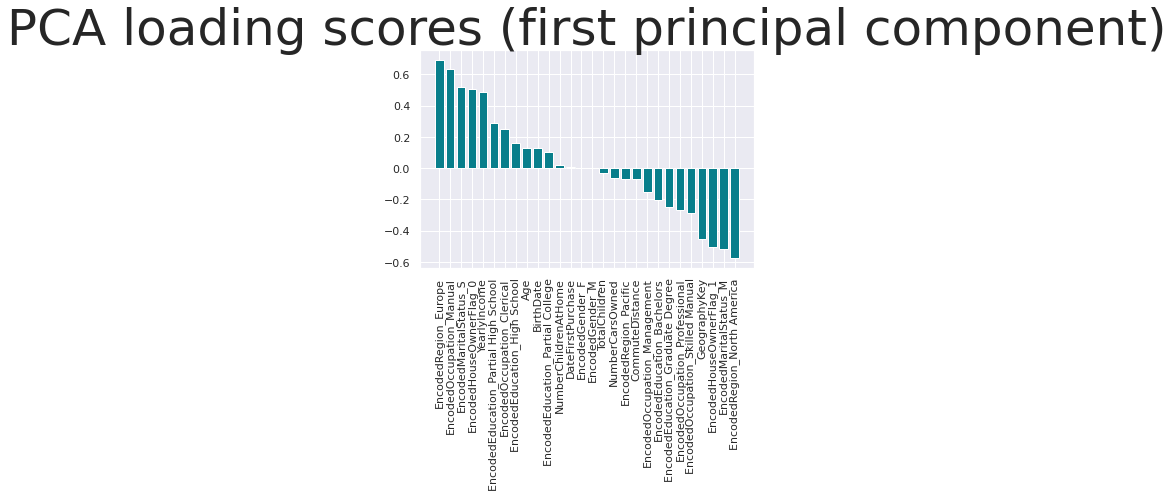

In [332]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=50)
plt.xticks(rotation='vertical')
plt.show()

In [333]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [334]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
#iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

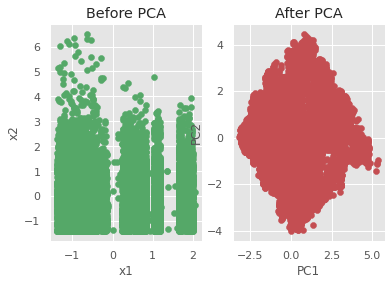

In [336]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c='g')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c='r')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()